In [89]:
#Important imports for running code
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [90]:
Calibrations =['Data_Air_to_Glass_Labday_3.txt','Data_Glass_to_Air_Labday_3.txt']

Air_to_Glass = np.loadtxt(Calibrations[0])
Glass_to_Air = np.loadtxt(Calibrations[1])

theta1_atg = Air_to_Glass[:, 0]
thetam_atg = Air_to_Glass[:, 1]

theta1_gta = Glass_to_Air[:, 0]
thetam_gta = Glass_to_Air[:, 1]

# Convert into radians
theta1_atg = theta1_atg * np.pi/180
theta1_gta = theta1_gta * np.pi/180
thetam_atg = thetam_atg * np.pi/180
thetam_gta = np.unwrap(thetam_gta,period=np.pi) * np.pi/180

theta1 = np.array([theta1_atg, theta1_gta])
thetam = np.array([thetam_atg, thetam_gta])

theta2_list = []

# Calculate real angle
for i in range(len(theta1)):
    theta2_list.append(theta1[i] - thetam[i])

theta2 = np.array(theta2_list)

In [91]:
theta1_atg_err = np.full_like(np.sin(theta1[0]), abs(np.sin(0.5 * np.pi/180)))
theta2_atg_err = np.full_like(np.sin(theta2[0]), abs(np.sin(0.5 * np.pi/180)))
theta1_gta_err = np.full_like(np.sin(theta1[1]), abs(np.sin(0.5 * np.pi/180)))
theta2_gta_err = np.full_like(np.sin(theta2[1]), abs(np.sin(0.5 * np.pi/180)))

In [92]:
#Fit for the code
def n_fit(theta1, n):
    return theta1 / n

n_guess = 2

AIR TO GLASS LAB DAY 3

The index of refraction for the glass is 1.4542 plusminus 0.0134


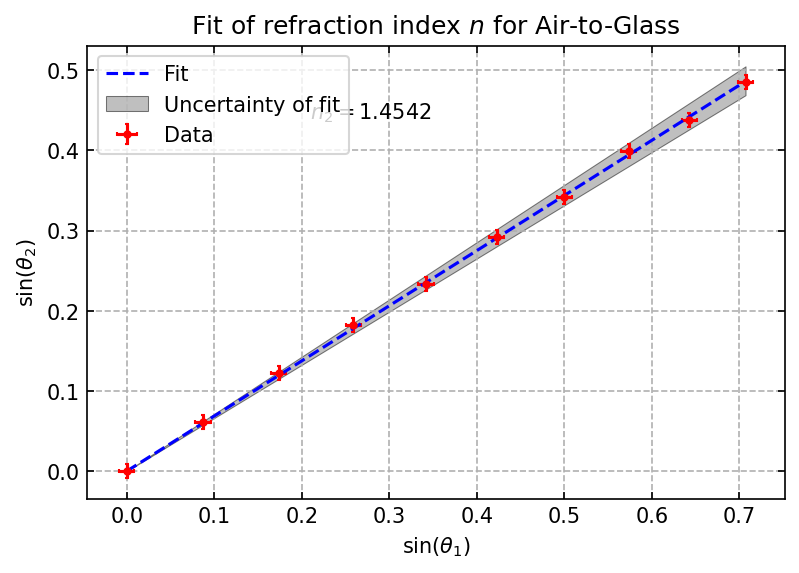

In [93]:
p_opt, p_cov = sp.curve_fit(n_fit, np.sin(theta1[0]), np.sin(theta2[0]), sigma = theta1_atg_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[0]), np.sin(theta2[0]), xerr = theta1_atg_err, yerr = theta2_atg_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt[0] - 4*np.sqrt(p_cov[0][0])), n_fit(np.sin(theta1[0]), p_opt[0] + 4* np.sqrt(p_cov[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Air-to-Glass')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt[0], 4), round(np.sqrt(p_cov[0][0]), 4)))
n_2_atg = np.sqrt(p_cov[0][0])
plt.show()

GLASS TO AIR LAB DAY 3

The index of refraction for the glass is 1.023 plusminus 0.0066


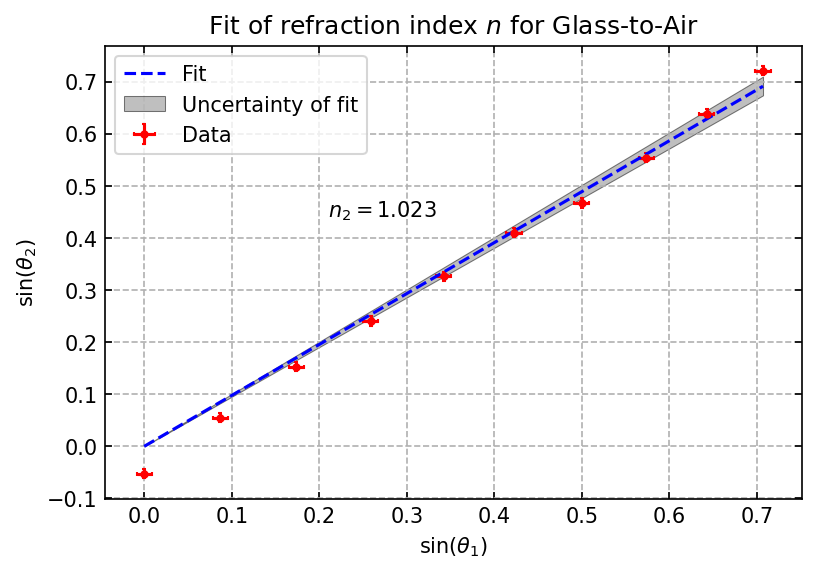

In [94]:
p_opt, p_cov = sp.curve_fit(n_fit, np.sin(theta1[1]), np.sin(theta2[1]), sigma = theta1_gta_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[1]), np.sin(theta2[1]), xerr = theta1_gta_err, yerr = theta2_gta_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt[0] - 4*np.sqrt(p_cov[0][0])), n_fit(np.sin(theta1[1]), p_opt[0] + 4* np.sqrt(p_cov[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Glass-to-Air')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt[0], 4), round(np.sqrt(p_cov[0][0]), 4)))
n_2_gta = np.sqrt(p_cov[0][0])
plt.show()




COMPARING R+T01

In [95]:
#Get data
S_pol_L3 = np.loadtxt('S_pol_AtG_Labday_3.txt')
P_pol_L3 = np.loadtxt('P_pol_AtG_Labday_3.txt')

#Intensity of laser
E_0_S = 1.8 #1.8 on the day
E_0_P = 1.25

#Intensity of transmitted and reflected light
E_1 = S_pol_L3[:,2]
E_2 = S_pol_L3[:,5]

E_1_P = P_pol_L3[:,2]
E_2_P = P_pol_L3[:,5]

In [96]:
#Getting the small r value
r_s = E_1/E_0_S
r_s

r_p =E_1_P/E_0_P
r_p, r_s

(array([0.344, 0.36 , 0.384, 0.368, 0.352, 0.32 , 0.32 , 0.312, 0.288,
        0.272, 0.24 , 0.232, 0.184, 0.152, 0.112, 0.08 , 0.036, 0.   ]),
 array([2.11111111, 2.27777778, 2.33333333, 2.22222222, 2.11111111,
        2.        , 1.83333333, 1.83333333, 1.72222222, 1.61111111,
        1.33333333, 1.33333333, 1.        , 0.77777778, 0.59444444,
        0.4       , 0.16944444, 0.02222222]))

In [97]:
#Getting the small t value
t_s = E_2/E_0_S
t_s

t_p = E_2_P/E_0_P
t_p

array([0.    , 0.    , 0.008 , 0.0096, 0.0064, 0.004 , 0.004 , 0.0008,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.008 , 0.036 ,
       0.088 , 0.184 ])

In [98]:
#Large R value:
R_s = r_s**2
R_s

R_p=r_p**2
R_p, R_s

(array([0.118336, 0.1296  , 0.147456, 0.135424, 0.123904, 0.1024  ,
        0.1024  , 0.097344, 0.082944, 0.073984, 0.0576  , 0.053824,
        0.033856, 0.023104, 0.012544, 0.0064  , 0.001296, 0.      ]),
 array([4.45679012e+00, 5.18827160e+00, 5.44444444e+00, 4.93827160e+00,
        4.45679012e+00, 4.00000000e+00, 3.36111111e+00, 3.36111111e+00,
        2.96604938e+00, 2.59567901e+00, 1.77777778e+00, 1.77777778e+00,
        1.00000000e+00, 6.04938272e-01, 3.53364198e-01, 1.60000000e-01,
        2.87114198e-02, 4.93827160e-04]))

In [99]:
#Import the angles measured:
theta1_s = S_pol_L3[:,0]
thetam_reflect_s = S_pol_L3[:,4]
thetam_trans_s = S_pol_L3[:,1]

theta1_p = P_pol_L3[:,0]
thetam_reflect_p = P_pol_L3[:,4]
thetam_trans_p = P_pol_L3[:,1]

#convert to radians:
theta1_s = theta1_s * np.pi/180
thetam_reflect_s = thetam_reflect_s * np.pi/180
thetam_trans_s = thetam_trans_s * np.pi/180
#thetam_reflect_s = np.unwrap(thetam_reflect_s,period=np.pi) * np.pi/180
#thetam_trans_s = np.unwrap(thetam_trans_s, period=np.pi) *np.pi/180

theta1_p = theta1_p * np.pi/180
thetam_reflect_p = thetam_reflect_p * np.pi/180
thetam_trans_p = thetam_trans_p *np.pi/180
#thetam_reflect_p = np.unwrap(thetam_reflect_p,period=np.pi) * np.pi/180
#thetam_trans_p = np.unwrap(thetam_trans_p, period=np.pi) *np.pi/180

# Calculate real angle
theta2_reflect_s = theta1_s - thetam_reflect_s
theta2_trans_s = theta1_s - thetam_trans_s

theta2_reflect_p = theta1_p - thetam_reflect_p
theta2_trans_p = theta1_p - thetam_trans_p

In [100]:
#Large T value:

T_s = (np.cos(theta2_trans_s)) / (np.cos(theta1_s)) *n_2_atg *t_s**2
T_s

T_p = (np.cos(theta2_trans_p)) / (np.cos(theta1_p)) *n_2_gta *t_p**2
T_p

array([0.00000000e+00, 0.00000000e+00, 4.28176727e-07, 6.22742698e-07,
       2.80751498e-07, 1.12068722e-07, 1.15244180e-07, 4.77403249e-09,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.65327585e-07, 2.54628241e-05,
       2.26773819e-04, 2.03196215e-03])

In [101]:
#Check if R+T holds:
total_s = R_s+T_s
total_s

total_p = R_p+T_p
total_p, total_s

(array([0.118336  , 0.1296    , 0.14745643, 0.13542462, 0.12390428,
        0.10240011, 0.10240012, 0.097344  , 0.082944  , 0.073984  ,
        0.0576    , 0.053824  , 0.033856  , 0.023104  , 0.01254497,
        0.00642546, 0.00152277, 0.00203196]),
 array([4.45679012, 5.1882716 , 5.44450454, 4.93842376, 4.45689284,
        4.0000983 , 3.36134877, 3.36124557, 2.96640502, 2.59608052,
        1.77899744, 1.77959868, 1.00399708, 0.61434306, 0.36926368,
        0.20901885, 0.18232341, 0.48565554]))

In [102]:
#Difference from 1
D_s = 1- R_s - T_s
D_s


array([-3.45679012e+00, -4.18827160e+00, -4.44450454e+00, -3.93842376e+00,
       -3.45689284e+00, -3.00009830e+00, -2.36134877e+00, -2.36124557e+00,
       -1.96640502e+00, -1.59608052e+00, -7.78997439e-01, -7.79598678e-01,
       -3.99708019e-03,  3.85656937e-01,  6.30736320e-01,  7.90981151e-01,
        8.17676591e-01,  5.14344462e-01])

In [103]:
#Brewster angle
Brewster = np.arctan(n_2_atg)
#Critical angle for internal reflection
Critical = np.arcsin(1/n_2_atg)

/tmp/ipykernel_3054/579063429.py:4: RuntimeWarning: invalid value encountered in arcsin
  Critical = np.arcsin(1/n_2_atg)


/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


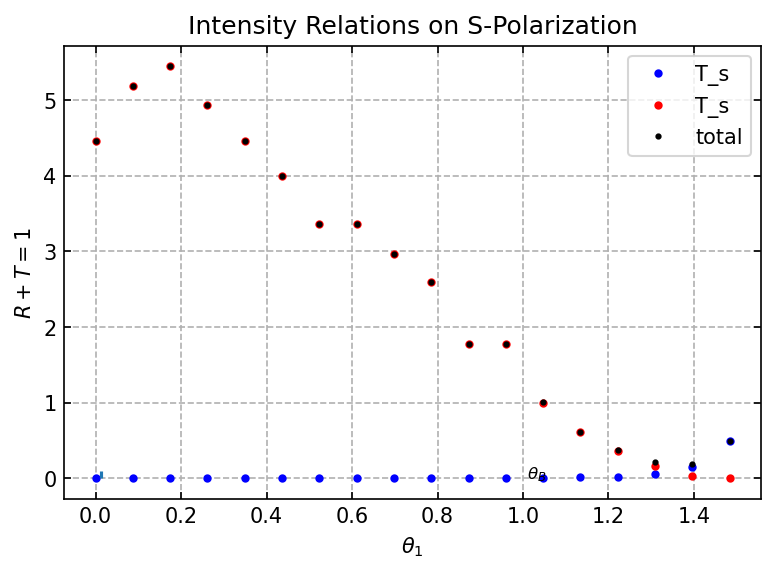

In [104]:
fig, ax = plt.subplots()

ax.plot(theta1_s, T_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_s, R_s, '.', color= 'red',label = 'T_s')  # Plotting Reflected Light
ax.plot(theta1_s, total_s, '.',markersize =4, color = 'black', label = 'total') #Plotting total light measured
ax.vlines(x = Brewster, ymin=0, ymax=0.1)
ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on S-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)
plt.show()

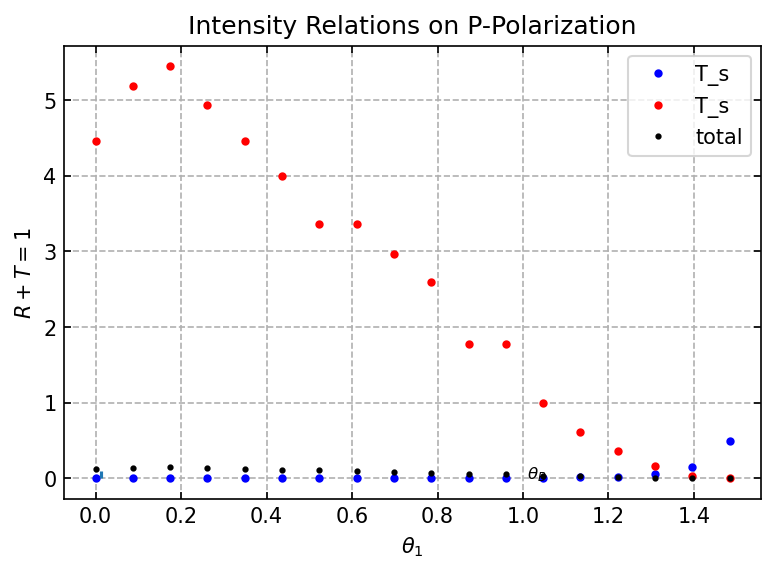

In [105]:
fig, ax = plt.subplots()

ax.plot(theta1_s, T_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_s, R_s, '.', color= 'red',label = 'T_s')  # Plotting Reflected Light
ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
ax.vlines(x = Brewster, ymin=0, ymax=0.1)
#ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on P-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)
plt.show()

INTENSITY PLOTS AIR TO GLASS

In [106]:
# Defining all the functions for the intensity
def reflected_p(angle1, angle2):
    return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2

def reflected_s(angle1, angle2):
    return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2

def transmitted_p(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))

def transmitted_s(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2

/tmp/ipykernel_3054/3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2
/tmp/ipykernel_3054/3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2
/tmp/ipykernel_3054/3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2
/tmp/ipykernel_3054/3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2


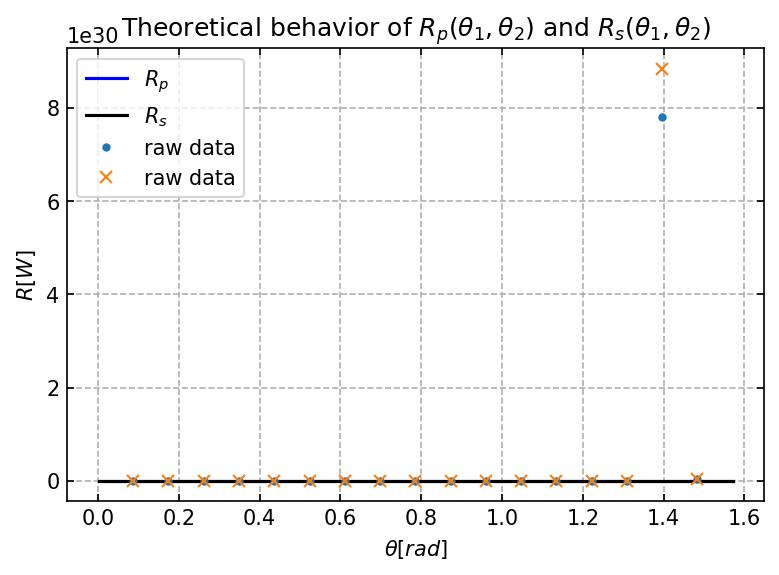

In [107]:
# Creating theoractical values for the angles
theoretical_theta1 = np.linspace(0, 90, 1000) * np.pi/180
theoretical_thetam = np.linspace(0, 50, 1000) * np.pi/180
theoretical_theta2 = theoretical_theta1 - theoretical_thetam

# Plotting reflection
plt.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), '-', color = 'blue', label = r'$R_p$')
plt.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '-', color = 'black', label = r'$R_s$')
plt.plot(theta1_s, reflected_s(theta1_s, theta2_reflect_s), '.', label = 'raw data')
plt.plot(theta1_p, reflected_p(theta1_p, theta2_reflect_p), 'x', label = 'raw data')


# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $R_p(\theta_1, \theta_2)$ and $R_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$R [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

/tmp/ipykernel_3054/3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
/tmp/ipykernel_3054/3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2
/tmp/ipykernel_3054/3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2
/tmp/ipykernel_3054/3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))


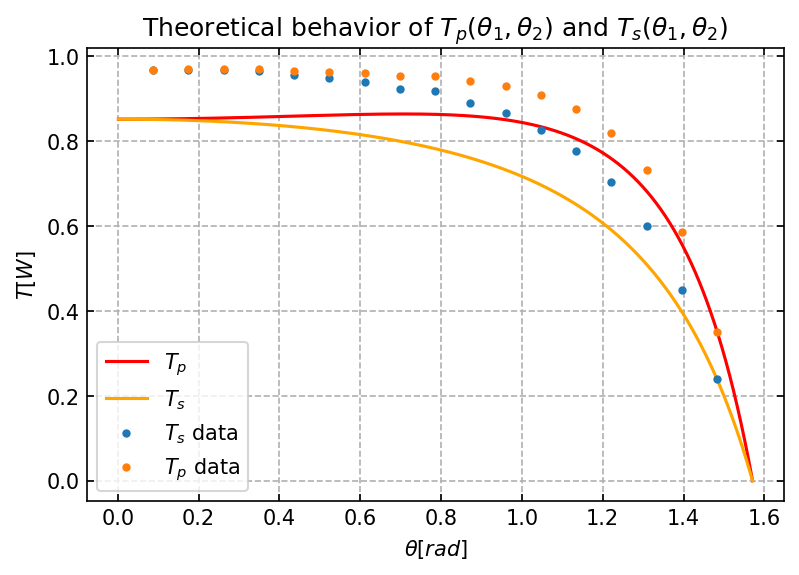

In [108]:
# Plotting transmission
plt.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), '-', color = 'red', label = r'$T_p$')
plt.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '-', color = 'orange', label = r'$T_s$')
plt.plot(theta1_s, transmitted_s(theta1_s, theta2_trans_s), '.', label = "$T_s$ data")
plt.plot(theta1_p, transmitted_p(theta1_p, theta2_trans_p), '.', label = "$T_p$ data")
# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $T_p(\theta_1, \theta_2)$ and $T_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$T [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

INTENSITY FOR GLASS TO AIR